Предположим, у вас есть 6 переменных, представляющих количество затраченного времени на различные предметы:

*   x1​ - время на математику
*   x2​ - время на литературу
*   x3​ - время на историю
*   x4​ - время на физику
*   x5​ - время на химию
*   x6​ - время на иностранный язык

Пусть общее время на предметы 40 часов. Нужно масимизировать время на физику и время математику при следующих ограничениях:
* x1 > x4
* x4 > x6
* x6 > x2
* x2 > x3
* x3 > x5



In [7]:
!pip install pulp

## Метод последовательных уступок

In [8]:
from pulp import LpProblem, LpMaximize, LpMinimize, LpVariable, lpSum
import numpy as np
import matplotlib.pyplot as plt

time = 40

def create_mo(time):
    prob = LpProblem("Mult_opt", LpMaximize)

    x1 = LpVariable("x1", lowBound=2)
    x2 = LpVariable("x2", lowBound=2)
    x3 = LpVariable("x3", lowBound=2)
    x4 = LpVariable("x4", lowBound=2)
    x5 = LpVariable("x5", lowBound=2)
    x6 = LpVariable("x6", lowBound=2)

    vars = [x1, x2, x3, x4, x5, x6]

    prob += x1 + x2 + x3 +x4 + x5 + x6 == time
    prob += (x1 >= x4)
    prob += (x4 >= x6)
    prob += (x6 >= x2)
    prob += (x2 >= x3)
    prob += (x3 >= x5)

    return prob, vars

eps = []
func1 = []
func2 = []

for i in range(1, 10, 1):
  i = i/10
  eps.append(i)
  model, vars = create_mo(time)
  model += vars[1] # 1 функция
  model.solve() #решаем первую задачу
  f1 = model.objective.value() #получаем значение функции для нее

  model, vars = create_mo(time)
  model += vars[0] # 2 функция
  model.solve() #решаем вторую задачу
  f2 = model.objective.value() #получаем значение функции для нее

  model, vars = create_mo(time) #генерим новую задачу
  model += (vars[0] >= f2*(1 - i)) #добавляем доп ограничение с учетом уступки
  model += vars[1]
  model.solve()
  f1 = model.objective.value()
  func1.append(f1)

  model, vars = create_mo(time) #генерим новую задачу
  model += (vars[1] >= f1*(1 - i)) #добавляем доп ограничение с учетом уступки
  model += vars[0]
  model.solve()
  f2 = model.objective.value()
  func2.append(f2)

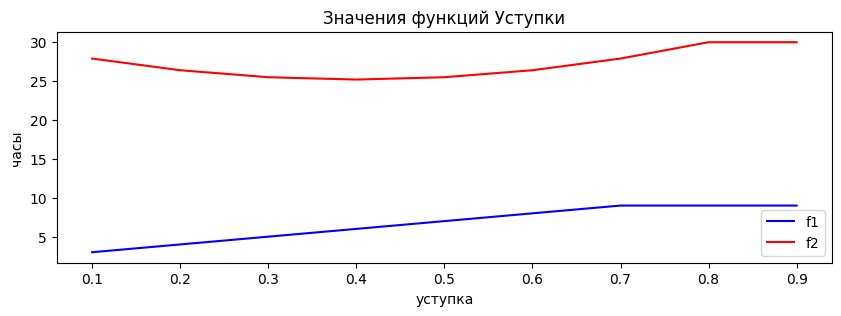

In [9]:
plt.figure(figsize=(10, 3))
plt.title("Значения функций Уступки")
plt.xlabel("уступка")
plt.ylabel("часы")
plt.plot(eps, func1, label="f1", color="blue")
plt.plot(eps, func2, label="f2", color="red")
plt.legend()
plt.show()

## Метод весовых коэффициентов

In [10]:
func_w = []
weights = [[0 , 1], [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5],
           [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1], [1, 0]]
model, vars = create_mo(time)
model += vars[1]
model.solve() #решаем первую задачу
f1 = model.objective.value() #получаем значение функции для нее
model, vars = create_mo(time) #генерим новую задачу
model += vars[0]
model.solve() #решаем вторую задачу
f2 = model.objective.value() #получаем значение функции для нее

for weight in weights:
  model, vars = create_mo(time) #новая модель
  model += (weight[0]* vars[1])/f1 - (weight[1]*vars[0])/f2
  model.solve()
  f = model.objective.value() #получаем значение функции для нее
  func_w.append(f)

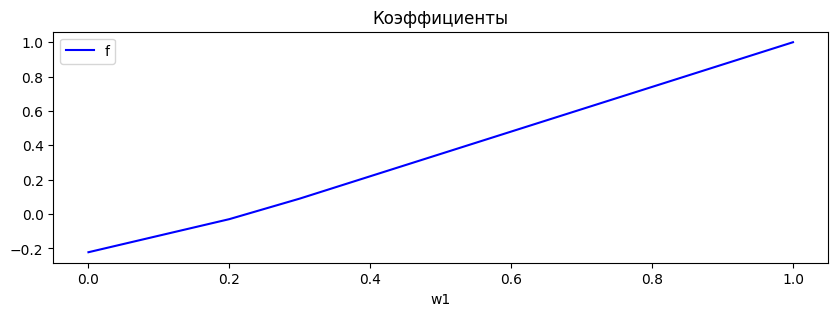

In [11]:
plt.figure(figsize=(10, 3))
plt.title("Коэффициенты")
plt.xlabel("w1")
plt.plot(np.array(weights)[:, 0], func_w, label="f", color="blue")
plt.legend()
plt.show()

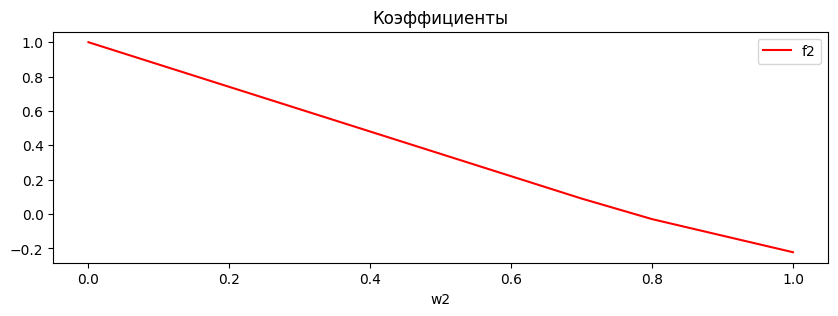

In [12]:
plt.figure(figsize=(10, 3))
plt.title("Коэффициенты")
plt.xlabel("w2")
plt.plot(np.array(weights)[:, 1], func_w, label="f2", color="red")
plt.legend()
plt.show()

# Выводы

В ходе выполнения работы была проведена многокритериальная оптимизация учебного расписания. Было максимизировано время для математики и физики. Задача была решена методом взаимных уступок и методом весовых коэффициентов. \\

* Различные весовые коэффициенты могут влиять на выбор предпочтительных решений в зависимости от относительной важности времени, затраченного на математику и физику.

* Подход с использованием метода взаимных уступок позволяет оценивать компромиссы и находить баланс между различными целями.